In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing the necessary requirement
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
#Reading the csv file into a pandas dataframe
df2 = pd.read_csv('/content/drive/MyDrive/next week forecast - Sheet1.csv')

### INITIAL EXPLORATORY ANALYSIS

In [6]:
#Total rows and columns in the dataset
df.shape

(400, 7)

In [7]:
#looking at the dataset in a glance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              400 non-null    object 
 1   Track             400 non-null    object 
 2   score             400 non-null    float64
 3   total_score       400 non-null    int64  
 4   percentage_score  400 non-null    float64
 5   weekly_score      400 non-null    float64
 6   weekly_rank       400 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 22.0+ KB


In [8]:
#first 5 rows
df.head()

,date,Track,score,total_score,percentage_score,weekly_score,weekly_rank
0,2025-03-04 8:38:00,reconcile_ai,10.0,10,100.0,107.74,1
1,2025-03-04 11:48:00,reconcile_ai,9.9,10,99.0,107.74,1
2,2025-03-04 17:43:00,reconcile_ai,5.0,5,100.0,107.74,1
3,2025-03-04 23:48:00,reconcile_ai,7.0,10,70.0,107.74,1
4,2025-03-05 10:53:00,reconcile_ai,7.0,10,70.0,107.74,1


In [12]:
#taking a quick view of the cardinality of each dataframe
print('df', '\n', df.select_dtypes('object').nunique())

df 
 date     40
Track    10
dtype: int64


In [13]:
#statistical view of the numerical columns in the dataset
df.describe()

,score,total_score,percentage_score,weekly_score,weekly_rank
count,400.000000,400.00000,400.000000,400.000000,400.000000
mean,5.518525,10.77500,50.113083,74.117725,5.500000
std,5.511546,6.33836,35.969858,17.034696,2.875878
min,-1.000000,1.00000,-10.000000,36.460000,1.000000
25%,1.000000,10.00000,10.000000,63.917000,3.000000
50%,5.000000,10.00000,55.000000,75.100000,5.500000
75%,8.000000,10.00000,80.000000,85.500000,8.000000
max,30.000000,30.00000,100.000000,110.200000,10.000000


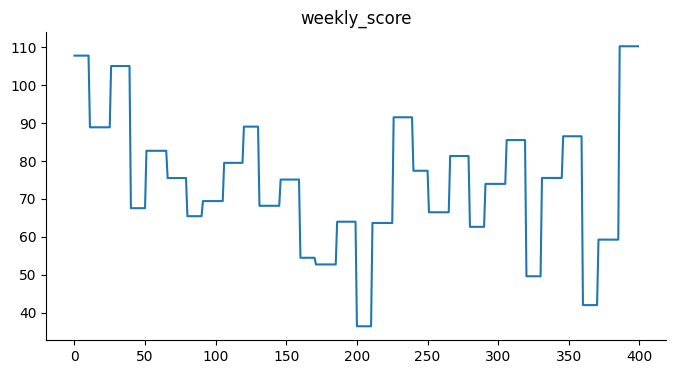

In [11]:
# @title weekly_score

from matplotlib import pyplot as plt
df['weekly_score'].plot(kind='line', figsize=(8, 4), title='weekly_score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
#checking for duplicate in the dataset
print("Number of duplicate rows:", df.duplicated(keep='first').sum())

Number of duplicate rows: 0


## TIME SERIES FORCAST

In [107]:
#due to the reading from CSV file, we lost our datetime format, adding it back
df2['date'] = pd.to_datetime(df2['date'])

In [114]:
import pandas as pd
from prophet import Prophet

# Ensure 'date' is in datetime format
df2['date'] = pd.to_datetime(df2['date'])

# Extract ISO week number and year
df2['week_number'] = df2['date'].dt.isocalendar().week
df2['year'] = df2['date'].dt.isocalendar().year

# Create 'week_start' as the Monday of each week
df2['week_start'] = pd.to_datetime(df2['year'].astype(str) + df2['week_number'].astype(str) + '1', format='%G%V%w')

# Aggregate scores per week per track
weekly_data = df2.groupby(['Track', 'week_start'])['score'].sum().reset_index()

forecast_results = {}

for track in weekly_data['Track'].unique():
    print(f"Fitting Prophet model for {track} using weekly data...")

    # Filter data for this track
    df_track = weekly_data[weekly_data['Track'] == track][['week_start', 'score']].rename(columns={'week_start': 'ds', 'score': 'y'})

    # Initialize Prophet model for weekly forecasting
    model = Prophet()
    model.fit(df_track)

    # Create future dataframe for the next week
    future = model.make_future_dataframe(periods=1, freq='W-MON')  # Weekly frequency

    # Forecast
    forecast = model.predict(future)

    # Get next week's forecast
    next_week_score = forecast.iloc[-1]['yhat']
    forecast_results[track] = next_week_score

# Convert forecast results to DataFrame
forecast_df = pd.DataFrame(list(forecast_results.items()), columns=['Track', 'Next_Week_Score'])

# Display forecasted values
print("\n Weekly Forecast for Next Week (Prophet Model)")
print(forecast_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_zj7ygd4/epl4j775.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_zj7ygd4/3llnv08b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16580', 'data', 'file=/tmp/tmp_zj7ygd4/epl4j775.json', 'init=/tmp/tmp_zj7ygd4/3llnv08b.json', 'output', 'file=/tmp/tmp_zj7ygd4/prophet_modelyyb1_saw/prophet_model-20250325231425.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:14:25 - cmdstanpy - INFO - Chain [1] start processing
IN

Fitting Prophet model for backendim using weekly data...
Fitting Prophet model for delve using weekly data...
Fitting Prophet model for genzad using weekly data...
Fitting Prophet model for gradific using weekly data...


INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_zj7ygd4/9xqhj2ir.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_zj7ygd4/mdix42u1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41915', 'data', 'file=/tmp/tmp_zj7ygd4/9xqhj2ir.json', 'init=/tmp/tmp_zj7ygd4/mdix42u1.json', 'output', 'file=/tmp/tmp_zj7ygd4/prophet_modelcrt2wzmr/prophet_model-20250325231425.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:14:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:14:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekl

Fitting Prophet model for outbound_ai using weekly data...
Fitting Prophet model for reconcile_ai using weekly data...
Fitting Prophet model for resolve using weekly data...


23:14:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_zj7ygd4/mbx4qa32.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_zj7ygd4/c3r964ro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27673', 'data', 'file=/tmp/tmp_zj7ygd4/mbx4qa32.json', 'init=/tmp/tmp_zj7ygd4/c3r964ro.json', 'output', 'file=/tmp/tmp_zj7ygd4/prophet_modelj4uu71gx/prophet_model-20250325231425.csv', 'method=optimiz

Fitting Prophet model for shopdesk using weekly data...
Fitting Prophet model for techiesmatch using weekly data...
Fitting Prophet model for telex using weekly data...


23:14:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



 Weekly Forecast for Next Week (Prophet Model)
          Track  Next_Week_Score
0     backendim        63.516996
1         delve        78.963828
2        genzad       138.630388
3      gradific        66.591584
4   outbound_ai       107.440828
5  reconcile_ai        97.814452
6       resolve        97.042088
7      shopdesk        85.510121
8  techiesmatch        83.175041
9         telex       119.331948


In [115]:
forecast_df

,Track,Next_Week_Score
0,backendim,63.516996
1,delve,78.963828
2,genzad,138.630388
3,gradific,66.591584
4,outbound_ai,107.440828
5,reconcile_ai,97.814452
6,resolve,97.042088
7,shopdesk,85.510121
8,techiesmatch,83.175041
9,telex,119.331948


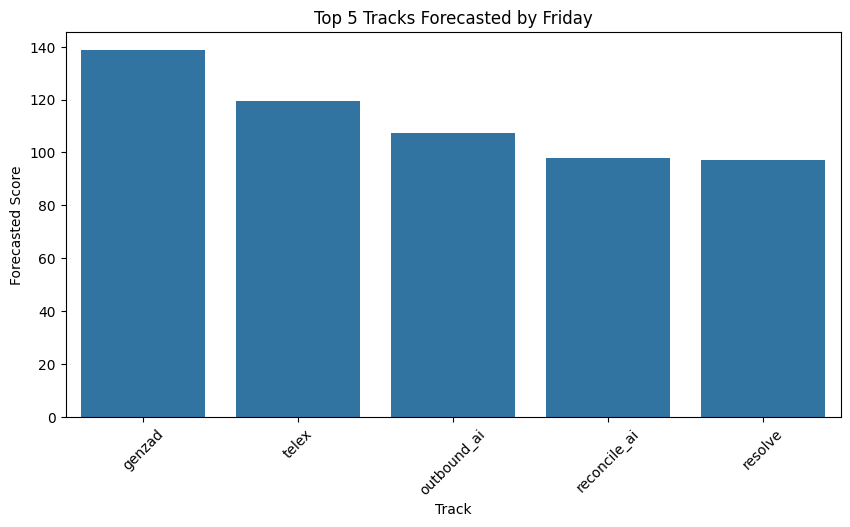

In [118]:
# Sort and get top 5 predicted tracks
top_5_by_friday = forecast_df.sort_values(by="Next_Week_Score", ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="Track", y="Next_Week_Score", data=top_5_by_friday)

# Labels and title
plt.xlabel("Track")
plt.ylabel("Forecasted Score")
plt.title("Top 5 Tracks Forecasted by Friday")
plt.xticks(rotation=45)
plt.show()